<a href="https://colab.research.google.com/github/AFLLAMA/data_analysis_practice/blob/main/plotting01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
gapminder = pd.read_csv('gapminder.csv')

In [5]:
gapminder[0:300:30]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
30,Afghanistan,1965,Asia,9935358.0,34.60,66.590,7.67,1182.0,3.236140
60,Afghanistan,1995,Asia,16772522.0,49.40,84.770,7.83,872.0,2.387406
90,Albania,1890,Europe,741688.0,35.40,62.480,4.60,1008.0,2.759754
120,Albania,1974,Europe,2358467.0,69.35,90.082,4.54,4177.0,11.436003
150,Albania,2004,Europe,3103758.0,75.90,97.850,2.00,6672.0,18.266940
180,Algeria,1953,Africa,9405445.0,43.96,73.758,7.65,4077.0,11.162218
210,Algeria,1983,Africa,21228288.0,64.97,90.110,6.39,10696.0,29.284052
240,Algeria,2013,Africa,38186135.0,76.30,97.480,2.80,12893.0,35.299110
270,Angola,1962,Africa,5465905.0,37.08,67.944,7.39,4034.0,11.044490


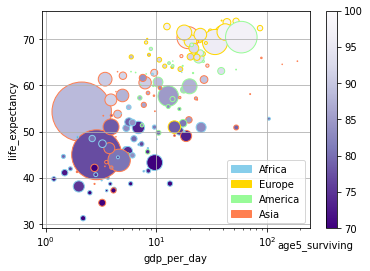

In [6]:
import matplotlib.patches as mpatches

def plotyear(year):
    data = gapminder.query('year == @year')
    area = 5e-6*data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue','Europe': 'gold', 'America': 'palegreen', "Asia":'coral'})
    colors=['skyblue','gold', 'palegreen', 'coral']
    labels=['Africa','Europe', 'America', "Asia"]
    
    patches = [mpatches.Patch(color=c,label=l) for c,l in zip(colors, labels)]
    cmap = matplotlib.cm.get_cmap('Purples_r')
    
    ax = data.plot.scatter('gdp_per_day', 'life_expectancy',logx=True,s=area,c=color, linewidth=1, 
                      colormap=cmap, 
                      vmin=70, vmax=100, sharex=False,
                      edgecolors=edgecolor)
    ax.text(125, 25,'age5_surviving')
    ax.legend(handles=patches)
    ax.grid(True)
plotyear(1965)

In [7]:
interact(plotyear, year=range(1965,2016,5))

interactive(children=(Dropdown(description='year', options=(1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 20…

<function __main__.plotyear>

## 03_06_categorical_variables

In [8]:
smoking = pd.read_csv('whickham.csv')

In [9]:
smoking.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [10]:
smoker = pd.DataFrame(smoking.smoker.value_counts())
smoker.head()

,smoker
No,732
Yes,582


In [11]:
# Outcome proportion
outcome = pd.DataFrame(smoking.outcome.value_counts(normalize=True))
outcome.head()

,outcome
Alive,0.719178
Dead,0.280822


In [12]:
bysmoker = smoking.groupby('smoker').outcome.value_counts(normalize=True)
bysmoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


In [13]:
smoking['ageGroup'] = pd.cut(smoking.age,[0,30,40,50,65],labels=['0-30','30-40','40-50','50-65'])

In [14]:
byage = smoking.groupby(['ageGroup','smoker']).outcome.value_counts(normalize=True)

In [15]:
byage.unstack()

outcome             Alive      Dead
ageGroup smoker                    
0-30     No      0.981818  0.018182
         Yes     0.975610  0.024390
30-40    No      0.955224  0.044776
         Yes     0.940678  0.059322
40-50    No      0.867470  0.132530
         Yes     0.828125  0.171875
50-65    No      0.676471  0.323529
         Yes     0.609756  0.390244

Text(0.5, 1.0, 'smoker')

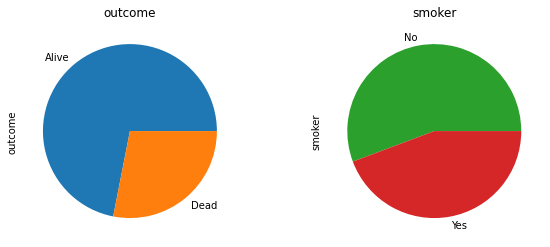

In [16]:
pp.figure(figsize = (10,4))
pp.subplot(1,2,1)
smoking.outcome.value_counts().plot(kind='pie',colors=['C0','C1'])
pp.title('outcome')
pp.subplot(1,2,2)
smoking.smoker.value_counts().plot(kind='pie',colors=['C2','C3'])
pp.title('smoker')

In [17]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

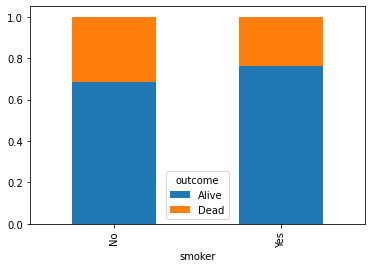

In [18]:
bysmoker.unstack().plot(kind='bar',stacked=True)


In [26]:
unstack_transpose = bysmoker.unstack().T

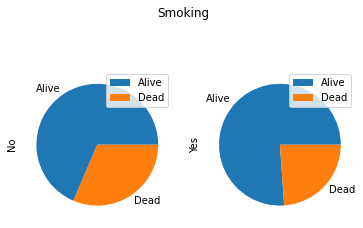

In [33]:
unstack_transpose.plot(kind='pie', subplots=True, stacked = True, title = 'Smoking')
pp.show()

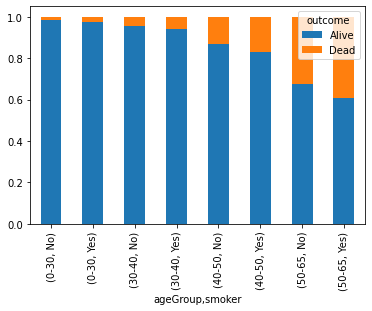

In [21]:
byage.unstack().plot(kind='bar',stacked=True)

In [22]:
byage2 = byage.unstack().drop('Dead',axis=1).unstack()
byage2

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-50     0.867470  0.828125
50-65     0.676471  0.609756

In [23]:
byage2.columns = ['No','Yes']
byage2.columns.name = 'smoker'
byage2

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-50,0.867470,0.828125
50-65,0.676471,0.609756


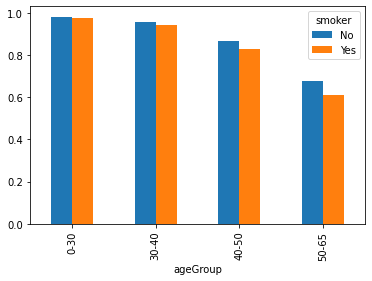

In [24]:
byage2.plot(kind = 'bar')

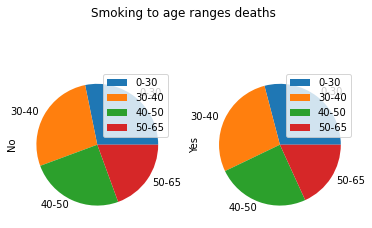

In [37]:
byage2.plot(kind = 'pie',subplots=True, title='Smoking to age ranges deaths')
pp.show()